<a href="https://colab.research.google.com/github/iMrugesh9/Cardiovascular_Risk_Prediction_Mrugesh_Patel/blob/main/Cardiovascular_Risk_Prediction_Mrugesh_Patel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Description

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.






As the prediction made is whether a person is diagnosed with CardioVascular heart disease, it is very vital to predict the outcome accurately. Especially predicting the class '*YES(1)*' accurately with as less false negatives as possible (predicting NO for actual YES) is very necessary.


Recall Score is one important metric to identify the effect of false negatives while predicting. F1 score is also important metric, because it considers both precision and recall.



\begin{align}
\mathbf{Recall}=\frac{True Positive}{True Positive+False Negative}
\\\\\\
\end{align}


\begin{align}
f1=\frac{2*True Positive}{True Positive+0.5(False Negative+False Negative)}
\end{align}

So the problem statement for the project is that to get the recall score and f1 score as high as possible for test dataset, ideally 1.0. So we need to formulate a model with atleast 0.95 recall score and f1 score.

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import missingno as msno
warnings.filterwarnings('ignore')
from google.colab import data_table
from scipy import stats
from numpy import math
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,f1_score
from sklearn.metrics import recall_score,classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.pipeline import Pipeline,make_pipeline

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.inspection import permutation_importance


# Data Exploration

In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')      

Mounted at /content/drive


In [3]:
# loading data
Dataset=pd.read_csv('/content/drive/MyDrive/Datasets/data_cardiovascular_risk.csv')

In [4]:
# dataset head
Dataset.head(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


In [5]:
# dataset head
Dataset.tail(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3380,3380,56,1.0,F,YES,20.0,0.0,0,0,0,240.0,125.0,79.0,27.38,80.0,82.0,0
3381,3381,63,1.0,F,NO,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
3382,3382,43,4.0,M,NO,0.0,0.0,0,1,0,260.0,129.0,90.0,25.29,70.0,62.0,0
3383,3383,57,3.0,F,NO,0.0,0.0,0,0,0,210.0,131.0,85.0,26.59,70.0,77.0,0
3384,3384,61,1.0,F,NO,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


## Data Description
### **Variables :**

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.
### **Demographic**:

• **Sex**: male or female("M" or "F")

• **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

### **Behavioral**

• **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")

• **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
### **Medical( history)**

• **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)

• **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)

• **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)

• **Diabetes**: whether or not the patient had diabetes (Nominal)

### **Medical(current)**

• **Tot Chol**: total cholesterol level (Continuous)

• **Sys BP**: systolic blood pressure (Continuous)

• **Dia BP**: diastolic blood pressure (Continuous)

• **BMI**: Body Mass Index (Continuous)

• **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• **Glucose**: glucose level (Continuous)
Predict variable (desired target)

• **10-year risk of coronary heart disease CHD** (binary: “1”, means “Yes”, “0” means “No”) 

In [6]:
# dataset variables information
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

The Dataset has 3390 rows of entries and 14 features (variables) for each row entries of id and the target variable TenYearCHD. Out of 14 variables, education cigsPerDay, BPmeds, totChol,BMI, heartrate, gluscose columns have some Null values. Since the dataset size is not huge, the null value treatment is very important. 

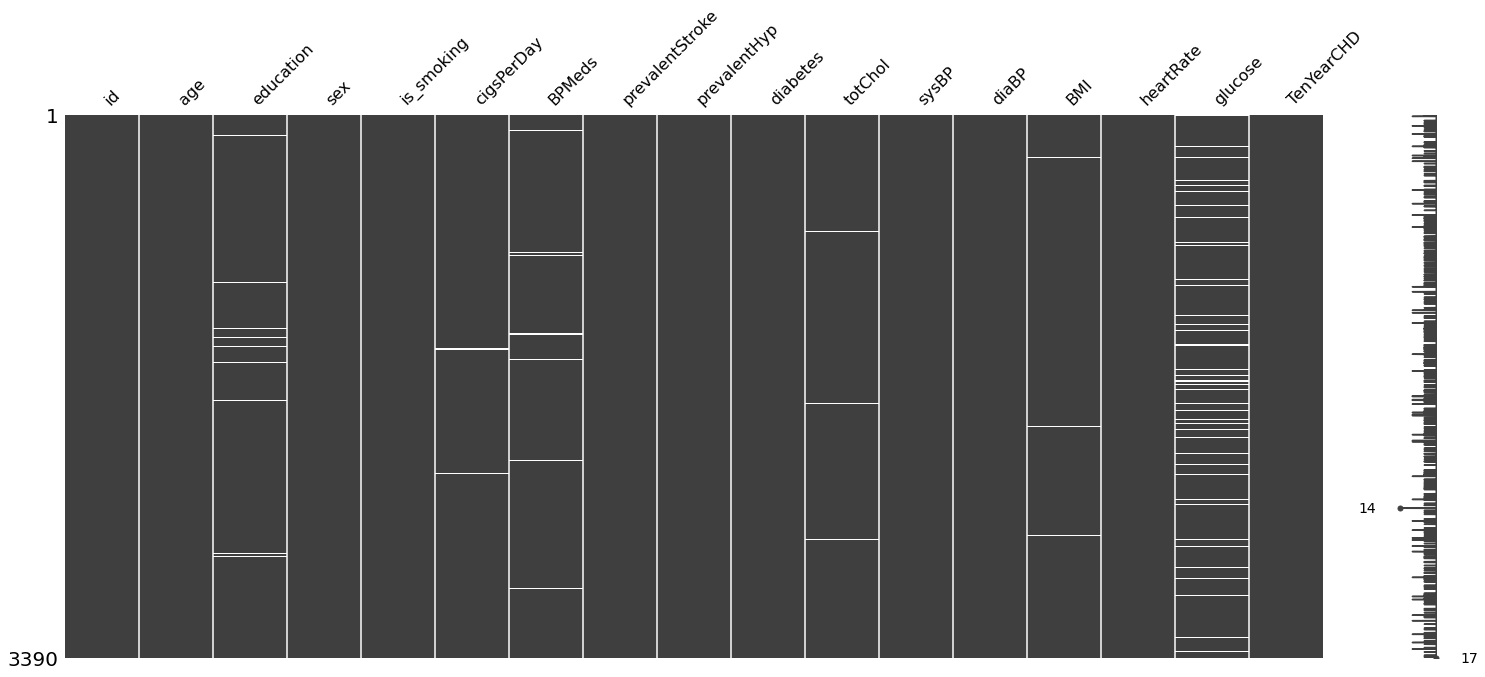

In [7]:
#missing no plot
msno.matrix(Dataset)

In [8]:
# Target Variable
Dataset.TenYearCHD.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

As there is imbalance in traget variable, resampling must be done on train dataset (SMOTE) to ensure the model outcome is not misleading. Here the target variable 1 means, TenYearCHD values is YES, i.e. CHD will occur. So it is very important to predict the value 1 most accurately as well as predict false negative (predict 0 for actual 1) as less as possible.

So The metric recall or f1 score for value '1' is the important metric, and will be chosen as the metric for the study.

In [9]:
#Dataset summary 
Dataset.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


It is obvious from above data summary, the BPmeds, prevalentStroke, prevalentHyp, diabetes are Binary variables, which can be considerede as a categorical variables and Sex and is_smoking are categorical variabels.

In [10]:
Dataset.education.value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

As we cam see, Education feature with only four unique values; So It is considered a also categorical feature.

# EDA

In [11]:
# categorical features names list
Categorical_features=['sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','education']

In [12]:
# numerical features names list
Numeric_Features=[x for x in Dataset.describe().columns if not x in ['id','TenYearCHD','BPMeds'	,'prevalentStroke','prevalentHyp','diabetes','education']]

In [13]:
Dataset[Numeric_Features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         3390 non-null   int64  
 1   cigsPerDay  3368 non-null   float64
 2   totChol     3352 non-null   float64
 3   sysBP       3390 non-null   float64
 4   diaBP       3390 non-null   float64
 5   BMI         3376 non-null   float64
 6   heartRate   3389 non-null   float64
 7   glucose     3086 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 212.0 KB


In [14]:
Dataset[Categorical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3390 non-null   object 
 1   is_smoking       3390 non-null   object 
 2   BPMeds           3346 non-null   float64
 3   prevalentStroke  3390 non-null   int64  
 4   prevalentHyp     3390 non-null   int64  
 5   diabetes         3390 non-null   int64  
 6   education        3303 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 185.5+ KB


## Univariate Analysis

First we will see the distribution plots of each numerical variables to check the normality of the distribution.

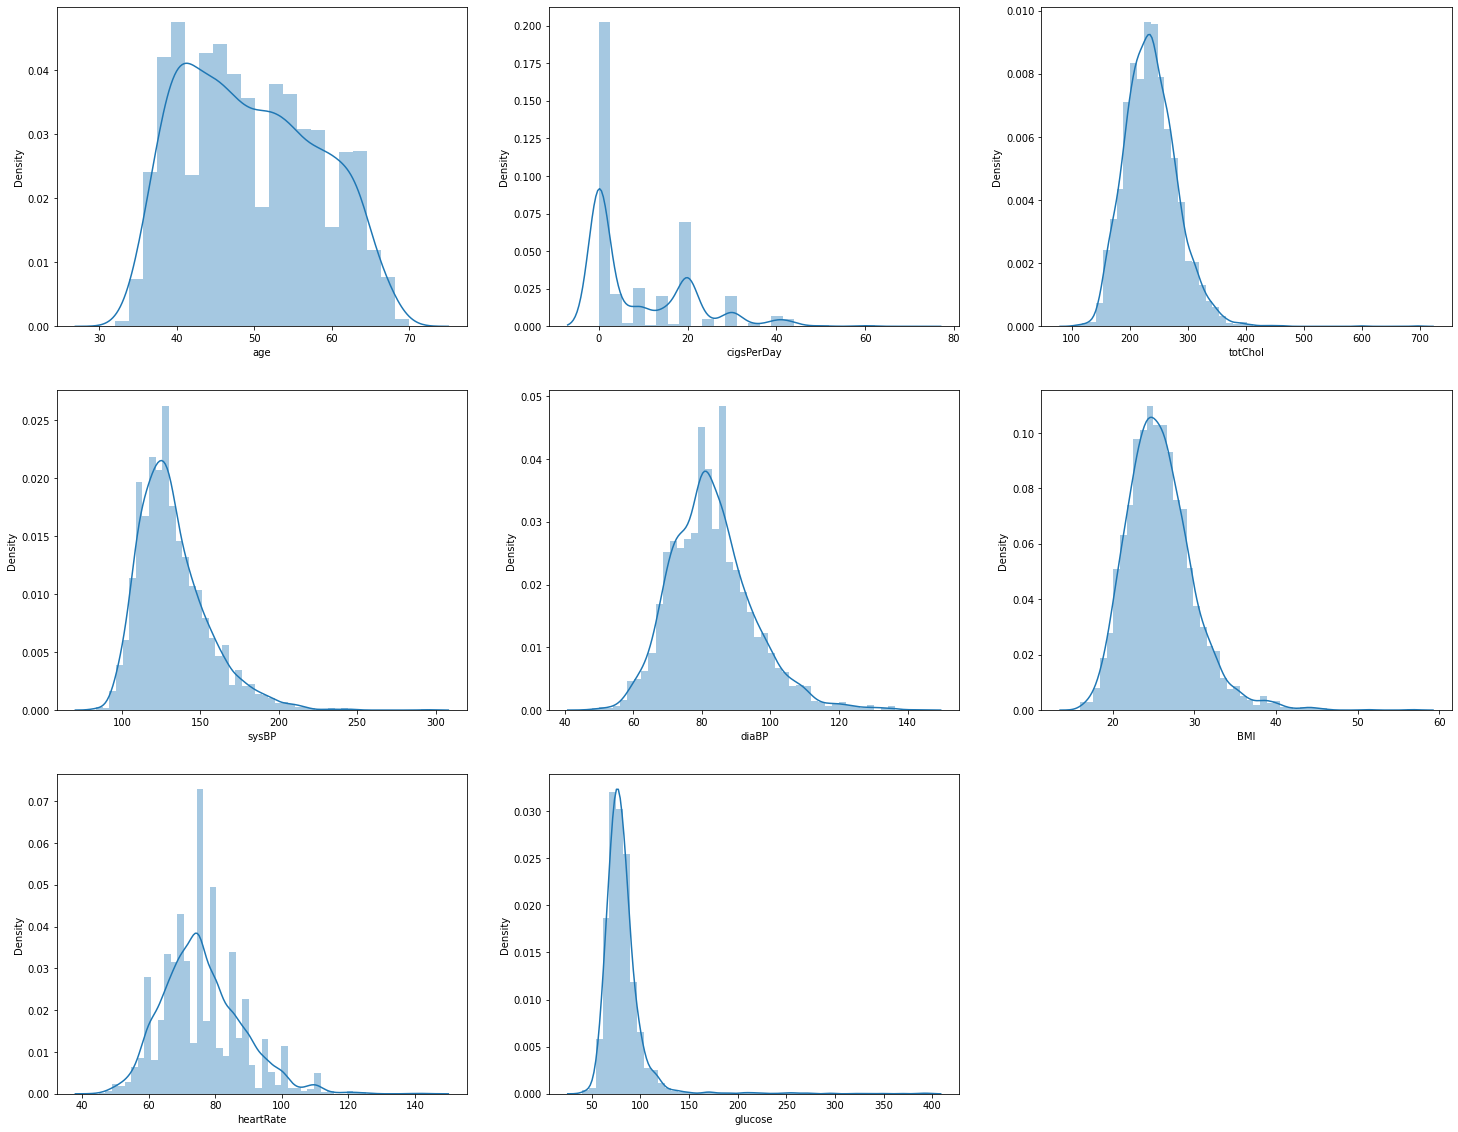

In [15]:
#plotting the numerical variable distributions
plt.figure(figsize=(25,20))
for num,feat in enumerate(Numeric_Features):
  plt.subplot(3,3,num+1)
  sns.distplot(Dataset[feat])




As we can see in the above plots, most distributions are positively skewed, especially sysBP, BMI, glucose and totChol. So Some Transformation must be applied before data preparation.

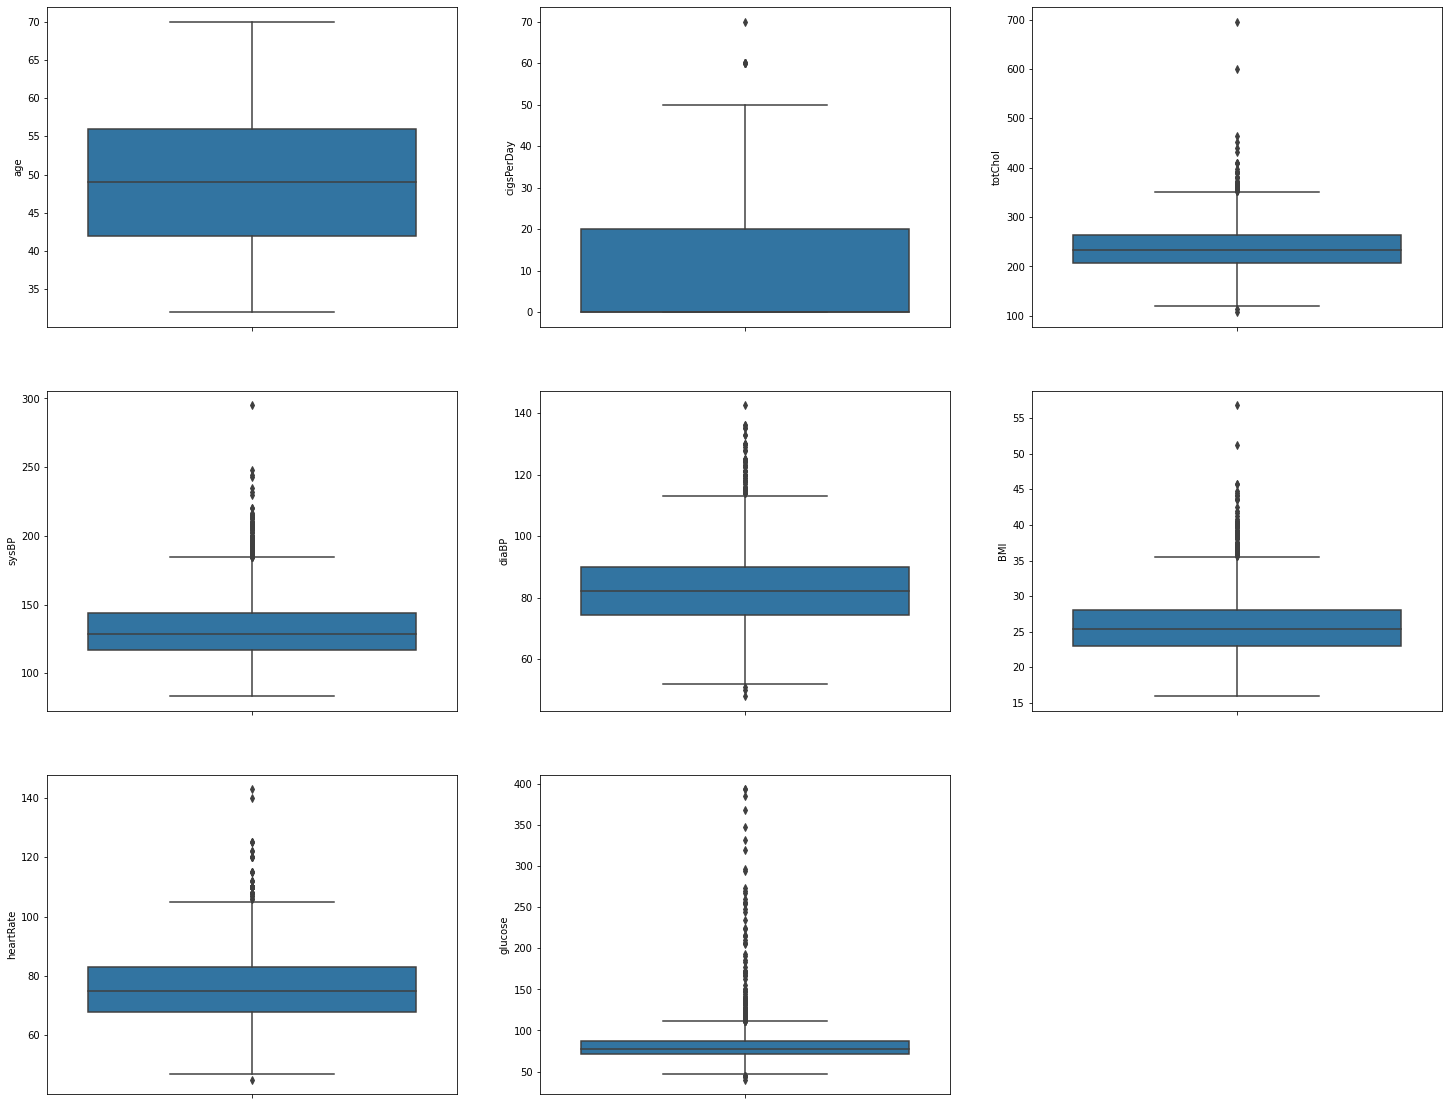

In [16]:
# boxplot of numerical features
plt.figure(figsize=(25,20))
for num,feat in enumerate(Numeric_Features):
  plt.subplot(3,3,num+1)
  sns.boxplot(y=feat,data=Dataset)


There are outliers in most of the numerical features, but as the dataset small we can not afford to drop any data. Also tree based algorithms and SVM , naive-bayes are not very sensitive to the outliers, so we can use those algorithms for the models.

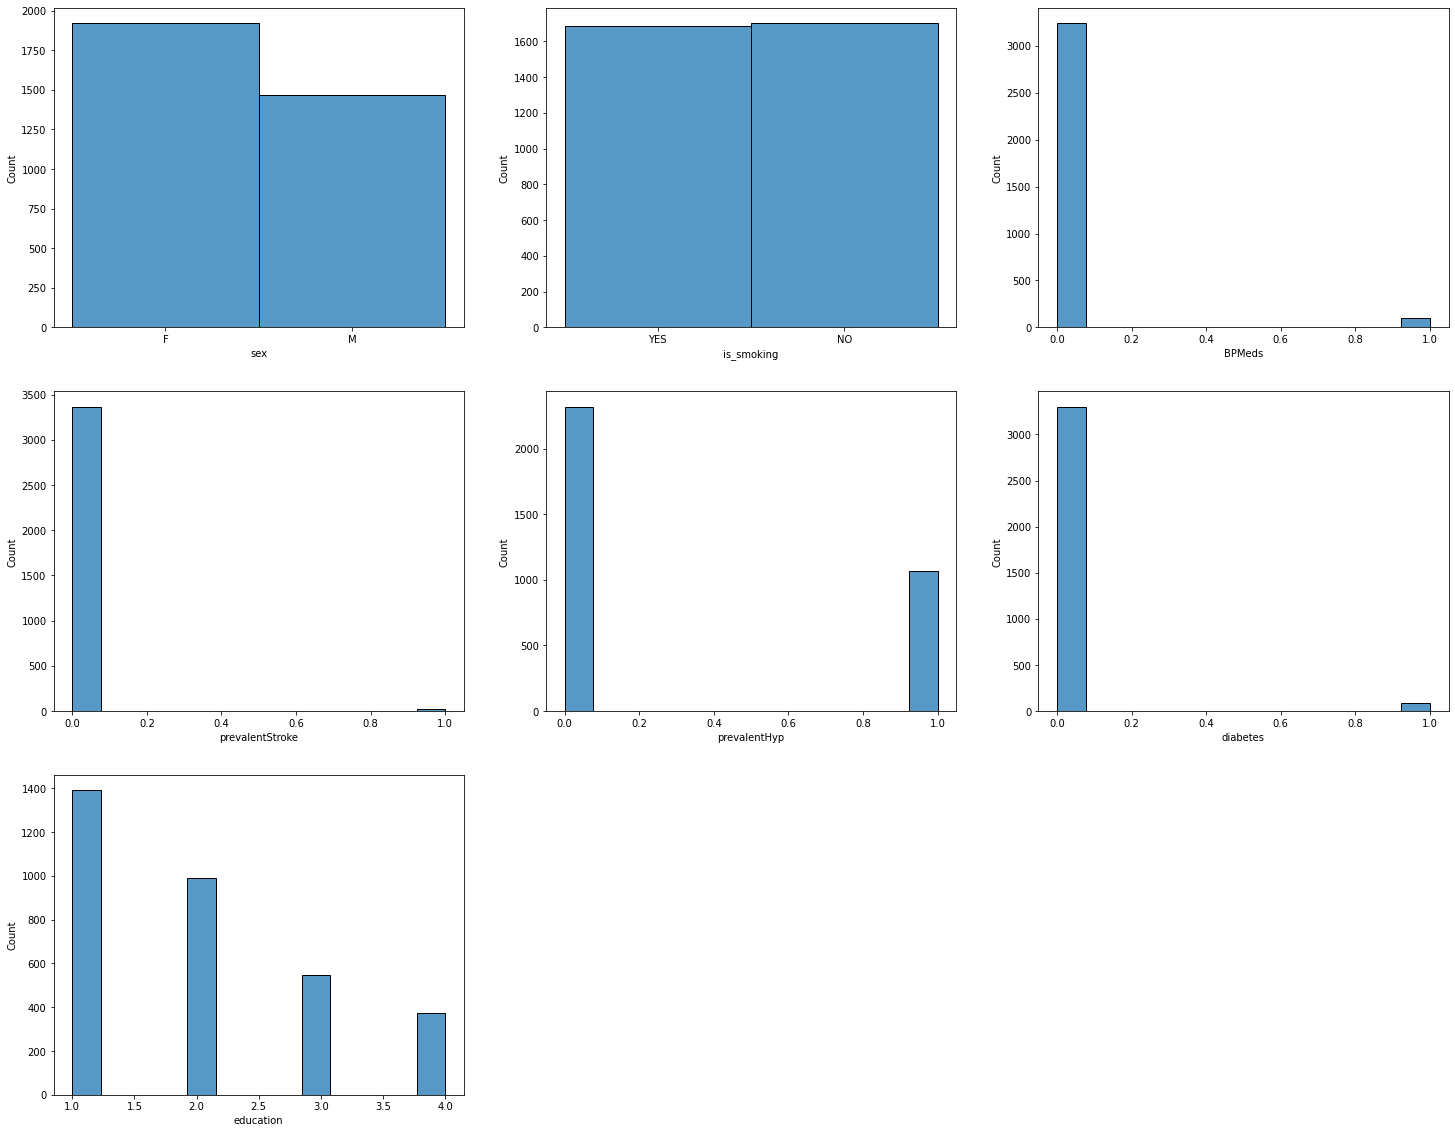

In [17]:
#count plot of the categorical features for each respective categories
plt.figure(figsize=(25,20))
for num,feat in enumerate(Categorical_features):
  plt.subplot(3,3,num+1)
  sns.histplot(x=feat,data=Dataset)

BPmeds,prevalentStroke and diabetes have most imbalanced categories as we can see above.

## Bivariate Analysis

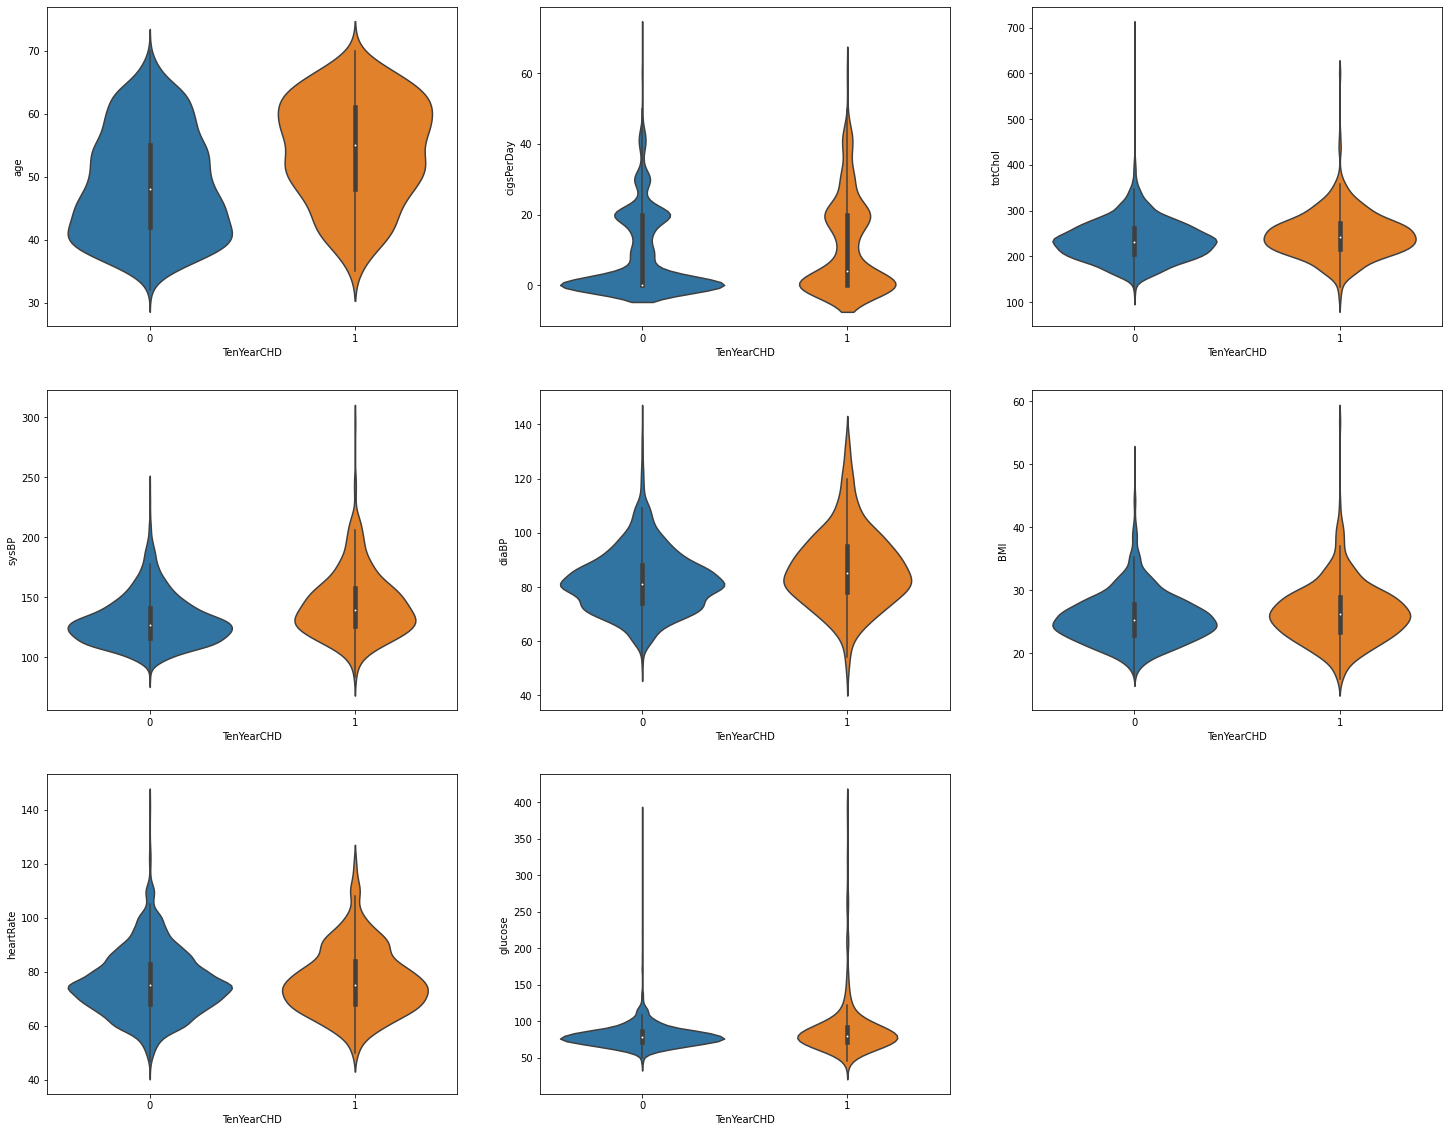

In [18]:
# Violin Plots for continous variables and target variable 
plt.figure(figsize=(25,20))
for num,feat in enumerate(Numeric_Features):
  plt.subplot(3,3,num+1)
  sns.violinplot(x='TenYearCHD',y=feat,data=Dataset)

There is not much ambiguity for bivariate analysis for continous variables-target variables pair.

# Feature Engineering

## Null value Treatment

In [19]:
# cigsPerDay and is_smoking similarity
Dataset[(Dataset['cigsPerDay']>0) & (Dataset['is_smoking']=='NO')]


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


- It is safe to assume that the Null values in the cigsPerDay columns can be imputed as 0.
- totChol,BMI,glucose distribution is slightly positively skewed, so the null values can be imputed by the median of the rest of the values for respective columns.
- heartrate values distribution is close to normal distribution, so mean value can be imputed for null values in the column.


In [20]:
# Null value treatment for continous variables 
Dataset['cigsPerDay']=Dataset['cigsPerDay'].fillna(0)
Dataset['totChol']=Dataset['totChol'].fillna(Dataset['totChol'].median())
Dataset['BMI']=Dataset['BMI'].fillna(Dataset['BMI'].median())
Dataset['heartRate']=Dataset['heartRate'].fillna(Dataset['heartRate'].mean())
Dataset['glucose']=Dataset['glucose'].fillna(Dataset['glucose'].median())

For BPMeds and education mode can be appropriate value for imputing null values for respective columns

In [21]:
# counts for BPMeds unique values
Dataset.BPMeds.value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

In [22]:
# counts for education unique values
Dataset.education.value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [23]:
# null value treatment for categorical variables
#na values filled with mode 
Dataset['BPMeds']=Dataset.BPMeds.fillna(0)
#converting education values to float data type
Dataset['education']=Dataset['education'].astype('float')
# Null values imputed with mode for education
Dataset.education.replace(np.nan,Dataset['education'].mode()[0],inplace=True)


In [24]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

## Encoding

Here there are two categorical variables with str type values, *'sex'* and *'is_smoking'*.

Now the column *'is_smoking'* can be dropped, as 0 value in column cigsPerDay conveys same thing. So it would be redundant.

And for sex values, one hot encoding can be used.

In [25]:
#coping original dataset
Dataset_copy=Dataset.copy()

# dropping is_smoking columns
Dataset.drop(columns='is_smoking',inplace=True)

# One hot encoding of sex column 
Dataset=pd.get_dummies(Dataset,columns=['sex'],prefix='sex')#one-hot encoding



In [26]:
Dataset.head()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_F,sex_M
0,0,64,2.0,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,1,0
1,1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,1
2,2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,0
3,3,50,1.0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,0,1
4,4,64,1.0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,0


In [27]:
# listing updated list of categorical features
Categorical_features=['sex_F','sex_M','BPMeds','prevalentStroke','prevalentHyp','diabetes','education','TenYearCHD']


## Correlation

### Categorical-categorical corr

Correlation for Categorical-Categorical pairs, cramers_V values must be used to accurately find the colinearity, instead of pearson's values.

In [28]:
# categorical-categorical corr
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [29]:
# Dataframe table for cramer values for categorical values
data_encoded=Dataset[Categorical_features]
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df_cat_cat= pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)


In [30]:
df_cat_cat

,sex_F,sex_M,BPMeds,prevalentStroke,prevalentHyp,diabetes,education,TenYearCHD
sex_F,1.00,1.00,0.00,0.00,0.00,0.00,0.02,0.01
sex_M,1.00,1.00,0.00,0.00,0.00,0.00,0.02,0.01
BPMeds,0.00,0.00,0.99,0.01,0.07,0.00,0.00,0.01
prevalentStroke,0.00,0.00,0.01,0.95,0.00,0.00,0.00,0.00
prevalentHyp,0.00,0.00,0.07,0.00,1.00,0.01,0.01,0.03
diabetes,0.00,0.00,0.00,0.00,0.01,0.99,0.00,0.01
education,0.02,0.02,0.00,0.00,0.01,0.00,1.00,0.01
TenYearCHD,0.01,0.01,0.01,0.00,0.03,0.01,0.01,1.00


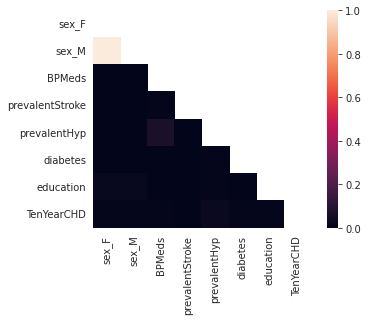

In [31]:
# plotting categorical correlation matrix
mask = np.zeros_like(df_cat_cat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  ax = sns.heatmap(df_cat_cat, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

There is no apparaent correlation for any categorical variables as we can see in the figure above.

### Continous-Continous Correlation

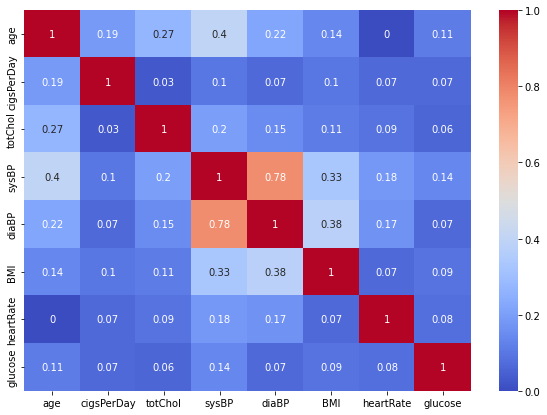

In [32]:
#correlation
plt.figure(figsize=(10,7))
correlation = round(Dataset[Numeric_Features].corr(),2)
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

There is a high correlation for sysBP and diaBP pair. As we know Pulse pressure is one measure which is the difference b/w sysBP and diaBP. So we can drop diaBP and add add Pulse pressure in the dataset to move forward.

In [33]:
# creating pulse pressure column using sysB and diaBP values
Dataset['PP']=Dataset['sysBP']-Dataset['diaBP']
# dropping diaBP column for avoiding multicolinearity
Dataset.drop(columns=['diaBP'],inplace=True)

In [34]:
# updateing numerical features names list
Numeric_Features=['age',
 'cigsPerDay',
 'totChol',
'sysBP',
 'BMI',
 'heartRate',
 'glucose']

# Data Transformation and Preparation

As we have seen in the univariate analysis of continous features, some variables were positively skewed. We can apply log1p transformation for trying to make the distribution more like normal.

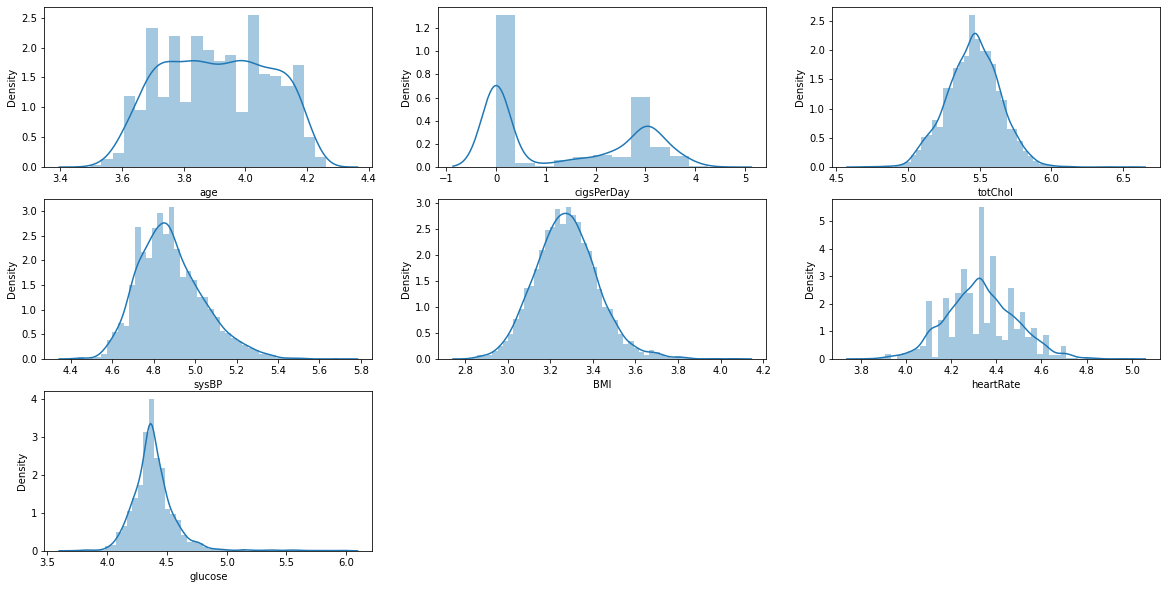

In [35]:
# log1p transformation of continous features
plt.figure(figsize=(20,10))

for num,feat in enumerate(Numeric_Features):
  plt.subplot(3,3,num+1)
  sns.distplot(np.log1p(Dataset[feat]))



Much improvement can be seen in terms of distribution for each continous features as we can see above. So before data preparation for models, log1p transformation will be applied.

In [36]:
#features and target data preparation

X=Dataset.drop(columns=['TenYearCHD','id'])
Features=X.columns
y=Dataset['TenYearCHD']
X

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,sex_F,sex_M,PP
0,64,2.0,3.0,0.0,0,0,0,221.0,148.0,25.38,90.0,80.0,1,0,63.0
1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,29.77,72.0,75.0,0,1,70.0
2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,20.35,88.0,94.0,1,0,45.0
3,50,1.0,20.0,0.0,0,1,0,233.0,158.0,28.26,68.0,94.0,0,1,70.0
4,64,1.0,30.0,0.0,0,0,0,241.0,136.5,26.42,70.0,77.0,1,0,51.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,0.0,0.0,0,0,0,261.0,123.5,29.28,70.0,103.0,1,0,44.5
3386,46,1.0,0.0,0.0,0,0,0,199.0,102.0,21.96,80.0,84.0,1,0,46.0
3387,44,3.0,3.0,0.0,0,1,0,352.0,164.0,28.92,73.0,72.0,0,1,45.0
3388,60,1.0,0.0,0.0,0,1,0,191.0,167.0,23.01,80.0,85.0,0,1,62.0


In [37]:
# #normalizing and transforming numerical features to better scale 
X[Numeric_Features]=X[Numeric_Features].apply(np.log1p)
X[Numeric_Features]=X[Numeric_Features].apply(zscore)
X

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,sex_F,sex_M,PP
0,1.560602,2.0,0.020119,0.0,0,0,0,-0.282994,0.773215,-0.030036,1.174479,0.010829,1,0,63.0
1,-1.744449,4.0,-0.924209,0.0,0,1,0,-0.506064,1.571906,1.012735,-0.271038,-0.315204,0,1,70.0
2,-0.341239,1.0,0.709211,0.0,0,0,0,0.378777,-0.759914,-1.463136,1.028726,0.826619,1,0,45.0
3,0.137847,1.0,1.149687,0.0,0,1,0,0.000760,1.185127,0.671868,-0.640635,0.826619,0,1,70.0
4,1.560602,1.0,1.414986,0.0,0,0,0,0.181957,0.263874,0.231896,-0.453233,-0.182287,1,0,51.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,1.188061,1.0,-0.924209,0.0,0,0,0,0.609966,-0.365923,0.903991,-0.453233,1.289778,1,0,44.5
3386,-0.341239,1.0,-0.924209,0.0,0,0,0,-0.845504,-1.568069,-0.970644,0.410989,0.257479,1,0,46.0
3387,-0.596302,3.0,0.020119,0.0,0,1,0,2.216878,1.420014,0.822971,-0.181804,-0.521285,0,1,45.0
3388,1.188061,1.0,-0.924209,0.0,0,1,0,-1.065538,1.534273,-0.667725,0.410989,0.317327,0,1,62.0


In [38]:
#preparing training and test data for models
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


# SMOTE (For balancing target variable values)

As we observed earlier, target variable has huge imbalance for categories. Using regular simple oversampler and undersampler can lead to problems like overfitting or loss of important data. SMOTE is one technique where problem of overfitting can be solved as, it generates more data, rather than copying. And applying undersampling in pipeline can provide better dataset for models.

In [39]:
# building smote with undersampler
over = SMOTE(random_state=1)
under = RandomUnderSampler(random_state=42)
# steps for SMOTE-under sampler
steps = [('o', over), ('u', under)]
# building pipeline
pipeline = Pipeline(steps=steps)
# preparing scaled data 
X_rescaled,y_rescaled=pipeline.fit_resample(X,y)
print('Label Size before ',y.shape[0])
print('Label Size After ',y_rescaled.shape[0])

Label Size before  3390
Label Size After  5758


In [40]:
# data preparation for smote with undersampler
X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(X_rescaled,y_rescaled,test_size=0.2,random_state=0)


# Applying different Models

In [41]:
# Function for generatinf final table with results
def model_report(model,model_name,y_train,y_test,test_preds,train_preds,PR_curve=False):
  print('\n         Model Report for ',model_name,'\n')
  ROCAUC_train=roc_auc_score(y_train,train_preds)
  ROCAUC_test=roc_auc_score(y_test,test_preds)
  print('ROC_AUC score for train data: ',ROCAUC_train)
  print('ROC_AUC score for test data: ',ROCAUC_test)
  print('classification_report for Train\n')
  print(classification_report(y_train,train_preds))
  print('\nclassification_report for Test\n')
  print(classification_report(y_test,test_preds))
  # displaying confusing matrix
  disp=ConfusionMatrixDisplay(confusion_matrix(y_test,test_preds),
                       display_labels=model.classes_)
  disp.plot()
  plt.show()
  if PR_curve==True:
    print('\n')
    precision_nsm, recall_nsm, _ = precision_recall_curve(y_test_sm,test_preds)
    plt.plot(recall, precision, marker='.', label='svc')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
  report=classification_report(y_test,test_preds,output_dict=True)  
  df_classification_report = pd.DataFrame(report).transpose()
  df_classification_report = df_classification_report

  return df_classification_report[:2]




# Logistic Regression (Baseline) 

In [42]:
# Logistic Regression model with cross validation
LgR_model_CV = LogisticRegressionCV(
        Cs=list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,random_state=0,
        cv=15
        ,max_iter=10000
        ,fit_intercept=True
        ,tol=10)
LgR_model_CV.fit(X_train_sm,y_train_sm)


LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                         0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0,
                         100000.0, 1000000.0, 10000000.0, 100000000.0,
                         1000000000.0],
                     cv=15, max_iter=10000, random_state=0, scoring='roc_auc',
                     tol=10)

### Report for Original Data

In [43]:
# predicting classes 
train_class_preds = LgR_model_CV.predict(X_train)
test_class_preds =LgR_model_CV.predict(X_test)


         Model Report for  Logistic Regression 

ROC_AUC score for train data:  0.6482217378095902
ROC_AUC score for test data:  0.6141114982578397
classification_report for Train

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      2305
           1       0.29      0.52      0.37       407

    accuracy                           0.74      2712
   macro avg       0.60      0.65      0.60      2712
weighted avg       0.81      0.74      0.76      2712


classification_report for Test

              precision    recall  f1-score   support

           0       0.89      0.73      0.80       574
           1       0.25      0.50      0.33       104

    accuracy                           0.69       678
   macro avg       0.57      0.61      0.57       678
weighted avg       0.79      0.69      0.73       678



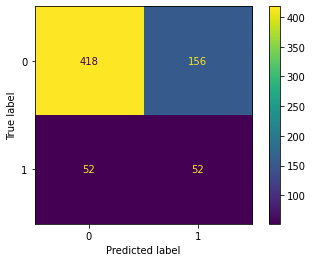

In [44]:
# generating model report
df_lgr=model_report(LgR_model_CV,'Logistic Regression',y_train,y_test,test_class_preds,train_class_preds)
df_report=pd.DataFrame(columns=df_lgr.columns)
df_report.loc['Logistic Regression']=df_lgr.iloc[1,:]

### Report for SMOTE data

In [45]:
# predicting classes
train_class_preds = LgR_model_CV.predict(X_train_sm)
test_class_preds =LgR_model_CV.predict(X_test_sm)


         Model Report for  Logistic Regression(SMOTE) 

ROC_AUC score for train data:  0.7198051948051949
ROC_AUC score for test data:  0.7391725726274918
classification_report for Train

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      2310
           1       0.74      0.68      0.71      2296

    accuracy                           0.72      4606
   macro avg       0.72      0.72      0.72      4606
weighted avg       0.72      0.72      0.72      4606


classification_report for Test

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       569
           1       0.76      0.70      0.73       583

    accuracy                           0.74      1152
   macro avg       0.74      0.74      0.74      1152
weighted avg       0.74      0.74      0.74      1152



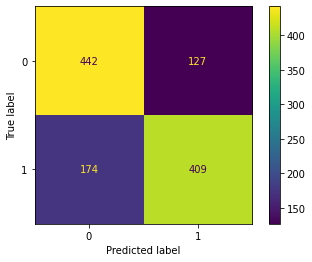

In [46]:
# generating report
df_lgr_sm=model_report(LgR_model_CV,'Logistic Regression(SMOTE)',y_train_sm,y_test_sm,test_class_preds,train_class_preds)
df_report_sm=pd.DataFrame(columns=df_lgr.columns)
df_report_sm.loc['Logistic Regression']=df_lgr_sm.iloc[1,:]

As we can see Model performed very poorly for both Data with the SMOTE and original data. We can go forward with tree based method.

# Random Forest 

In [47]:
# random forest with cross validation
RF_model=RandomForestClassifier()
grid_values={'n_estimators':[50,80,100],'max_depth':[3,5,7]}
RF_model_CV=GridSearchCV(RF_model,param_grid=grid_values,scoring='roc_auc',cv=5)
RF_model_CV.fit(X_train_sm,y_train_sm)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

### Report for Original Data

In [48]:
train_preds =  RF_model_CV.predict(X_train)
test_preds  = RF_model_CV.predict(X_test)


         Model Report for  RF 

ROC_AUC score for train data:  0.7339524695273069
ROC_AUC score for test data:  0.7241021173948002
classification_report for Train

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      2305
           1       0.43      0.61      0.51       407

    accuracy                           0.82      2712
   macro avg       0.68      0.73      0.70      2712
weighted avg       0.85      0.82      0.83      2712


classification_report for Test

              precision    recall  f1-score   support

           0       0.92      0.81      0.87       574
           1       0.38      0.63      0.48       104

    accuracy                           0.79       678
   macro avg       0.65      0.72      0.67       678
weighted avg       0.84      0.79      0.81       678



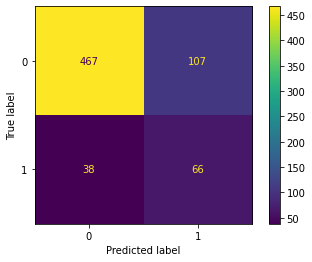

In [49]:
dict_rf=model_report(RF_model_CV,'RF',y_train,y_test,test_preds,train_preds)
df_report.loc['Random Forest']=dict_rf.iloc[1,:]

### Report for SMOTE data

In [50]:
train_preds =  RF_model_CV.predict(X_train_sm)
test_preds  = RF_model_CV.predict(X_test_sm)


         Model Report for  RF(SMOTE) 

ROC_AUC score for train data:  0.8551736881005174
ROC_AUC score for test data:  0.8089995689226382
classification_report for Train

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      2310
           1       0.86      0.85      0.85      2296

    accuracy                           0.86      4606
   macro avg       0.86      0.86      0.86      4606
weighted avg       0.86      0.86      0.86      4606


classification_report for Test

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       569
           1       0.81      0.81      0.81       583

    accuracy                           0.81      1152
   macro avg       0.81      0.81      0.81      1152
weighted avg       0.81      0.81      0.81      1152



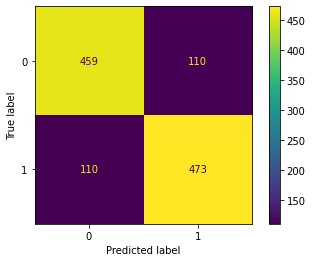

In [51]:
dict_rf_sm=model_report(RF_model_CV,'RF(SMOTE)',y_train_sm,y_test_sm,test_preds,train_preds)
df_report_sm.loc['Random Forest']=dict_rf_sm.iloc[1,:]

Random Forest model produced 0.81 recall value as well as f1 score, but performed poorly on original data. 

# XGBoost

In [52]:
# building XGB model with cross validation
XGB = XGBClassifier(colsample_bytree = 1,min_child_weight= 1, alpha = 10)
grid_values={'n_estimators':[50,100,200,500],'max_depth':[4,6,8,10],'learning_rate':[0.01,0.5,0.1]}
XGB=GridSearchCV(XGB,param_grid=grid_values,scoring='roc_auc',cv=5)


In [53]:
# fitting the data 
XGB.fit(X_train_sm,y_train_sm)

GridSearchCV(cv=5, estimator=XGBClassifier(alpha=10),
             param_grid={'learning_rate': [0.01, 0.5, 0.1],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='roc_auc')

### Report for SMOTE data

In [54]:
# predicting classes
train_preds =  XGB.predict(X_train_sm)
test_preds  = XGB.predict(X_test_sm)


         Model Report for  XGB(SMOTE) 

ROC_AUC score for train data:  1.0
ROC_AUC score for test data:  0.9176597021044413
classification_report for Train

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2310
           1       1.00      1.00      1.00      2296

    accuracy                           1.00      4606
   macro avg       1.00      1.00      1.00      4606
weighted avg       1.00      1.00      1.00      4606


classification_report for Test

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       569
           1       0.93      0.91      0.92       583

    accuracy                           0.92      1152
   macro avg       0.92      0.92      0.92      1152
weighted avg       0.92      0.92      0.92      1152



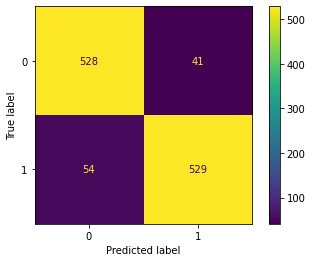

In [55]:
# generating report
dict_xgb_sm=model_report(XGB,'XGB(SMOTE)',y_train_sm,y_test_sm,test_preds,train_preds)
df_report_sm.loc['XGBoost']=dict_xgb_sm.iloc[1,:]


### Report for Original Data

In [56]:
train_preds =  XGB.predict(X_train)
test_preds  = XGB.predict(X_test)


         Model Report for  XGB 

ROC_AUC score for train data:  0.9470262808657602
ROC_AUC score for test data:  0.941470115250603
classification_report for Train

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2305
           1       0.93      0.91      0.92       407

    accuracy                           0.98      2712
   macro avg       0.96      0.95      0.95      2712
weighted avg       0.98      0.98      0.98      2712


classification_report for Test

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       574
           1       0.89      0.90      0.90       104

    accuracy                           0.97       678
   macro avg       0.93      0.94      0.94       678
weighted avg       0.97      0.97      0.97       678



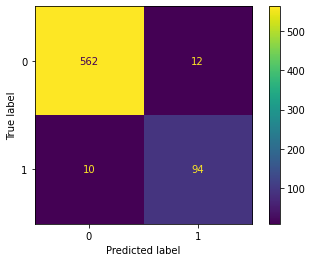

In [57]:
dict_xgb=model_report(XGB,'XGB',y_train,y_test,test_preds,train_preds)
df_report.loc['XGBoost']=dict_xgb.iloc[1,:]

As we can see XGB model produced good results, with 0.89 recall and 0.9 f1 score for SMOTE data, although model produced recall, f1 score of 1.0 for training data, that means the model overfitted. 

For original data, model produced 0.94 racall and f1 score.

# Naive-Bayes

In [58]:
# naive bayes model with cross validation
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-12, num=200)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 verbose=1, 
                 scoring='roc_auc') 
gs_NB.fit(X_train_sm, y_train_sm)

gs_NB.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


{'var_smoothing': 0.00027682866303920667}

### Report for SMOTE data

In [59]:
# predicting classes
train_preds =gs_NB.predict(X_train_sm)
test_preds  = gs_NB.predict(X_test_sm)


         Model Report for  GaussianNB(SMOTE) 

ROC_AUC score for train data:  0.6486115510505754
ROC_AUC score for test data:  0.6497888323832548
classification_report for Train

              precision    recall  f1-score   support

           0       0.62      0.76      0.68      2310
           1       0.69      0.54      0.61      2296

    accuracy                           0.65      4606
   macro avg       0.66      0.65      0.64      4606
weighted avg       0.66      0.65      0.64      4606


classification_report for Test

              precision    recall  f1-score   support

           0       0.62      0.76      0.68       569
           1       0.70      0.54      0.61       583

    accuracy                           0.65      1152
   macro avg       0.66      0.65      0.64      1152
weighted avg       0.66      0.65      0.64      1152



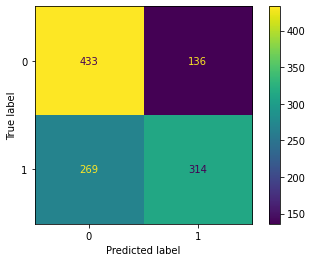

In [60]:
# generating report
dict_NB_sm=model_report(gs_NB,'GaussianNB(SMOTE)',y_train_sm,y_test_sm,test_preds,train_preds)
df_report_sm.loc['Gaussian NB']=dict_NB_sm.iloc[1,:]

### Report for Original Data

In [61]:
# predicting classes
train_preds =  gs_NB.predict(X_train)
test_preds  = gs_NB.predict(X_test)


         Model Report for  GaussianNB 

ROC_AUC score for train data:  0.6498819466281506
ROC_AUC score for test data:  0.6224370142053068
classification_report for Train

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      2305
           1       0.29      0.53      0.37       407

    accuracy                           0.73      2712
   macro avg       0.60      0.65      0.60      2712
weighted avg       0.81      0.73      0.76      2712


classification_report for Test

              precision    recall  f1-score   support

           0       0.89      0.72      0.79       574
           1       0.25      0.53      0.34       104

    accuracy                           0.69       678
   macro avg       0.57      0.62      0.57       678
weighted avg       0.80      0.69      0.73       678



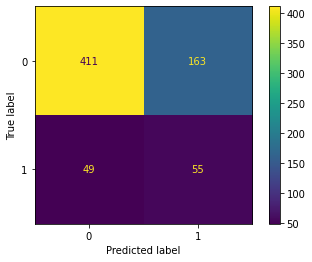

In [62]:
# generating report
dict_NB=model_report(gs_NB,'GaussianNB',y_train,y_test,test_preds,train_preds)
df_report.loc['Gaussian NB']=dict_NB.iloc[1,:]

Gaussian Naive bayes model produced poor results for both original data and data with SMOTE sampling.

# Adaboost

In [63]:

grid={'n_estimators':[1000],'learning_rate':[1]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model = AdaBoostClassifier()
ADA = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')


In [64]:
ADA_model=ADA.fit(X_train_sm,y_train_sm)

### Report for SMOTE data

In [65]:
train_preds =ADA_model.predict(X_train_sm)
test_preds  =ADA_model.predict(X_test_sm)


         Model Report for  Adaboost(SMOTE) 

ROC_AUC score for train data:  0.893711065357407
ROC_AUC score for test data:  0.8606338947387461
classification_report for Train

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      2310
           1       0.93      0.85      0.89      2296

    accuracy                           0.89      4606
   macro avg       0.90      0.89      0.89      4606
weighted avg       0.90      0.89      0.89      4606


classification_report for Test

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       569
           1       0.89      0.83      0.86       583

    accuracy                           0.86      1152
   macro avg       0.86      0.86      0.86      1152
weighted avg       0.86      0.86      0.86      1152



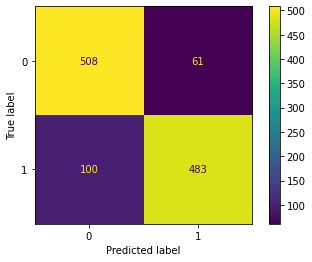

In [66]:
dict_adb_sm=model_report(ADA_model,'Adaboost(SMOTE)',y_train_sm,y_test_sm,test_preds,train_preds)
df_report_sm.loc['ADA Boost']=dict_adb_sm.iloc[1,:]

### Report for Original Data

In [67]:
train_preds =  gs_NB.predict(X_train)
test_preds  = gs_NB.predict(X_test)


         Model Report for  Adaboost 

ROC_AUC score for train data:  0.6498819466281506
ROC_AUC score for test data:  0.6224370142053068
classification_report for Train

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      2305
           1       0.29      0.53      0.37       407

    accuracy                           0.73      2712
   macro avg       0.60      0.65      0.60      2712
weighted avg       0.81      0.73      0.76      2712


classification_report for Test

              precision    recall  f1-score   support

           0       0.89      0.72      0.79       574
           1       0.25      0.53      0.34       104

    accuracy                           0.69       678
   macro avg       0.57      0.62      0.57       678
weighted avg       0.80      0.69      0.73       678



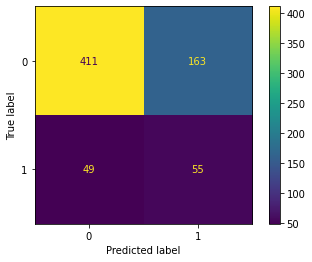

In [68]:
dict_adb=model_report(ADA_model,'Adaboost',y_train,y_test,test_preds,train_preds)
df_report.loc['ADA Boost']=dict_adb.iloc[1,:]

Adaboost model performed poorly for original data with recall score of 0.53 only.

# KNN

In [69]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(50))}
KNN=GridSearchCV(knn,param_grid=param_grid,scoring='roc_auc',cv=5)

In [70]:
KNN.fit(X_train_sm,y_train_sm)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                         12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
                                         22, 23, 24, 25, 26, 27, 28, 29, ...]},
             scoring='roc_auc')

### Report for SMOTE data

In [71]:
train_preds =KNN.predict(X_train_sm)
test_preds  =KNN.predict(X_test_sm)


         Model Report for  KNN(SMOTE) 

ROC_AUC score for train data:  0.9274416640270299
ROC_AUC score for test data:  0.8484642492169765
classification_report for Train

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      2310
           1       0.88      0.98      0.93      2296

    accuracy                           0.93      4606
   macro avg       0.93      0.93      0.93      4606
weighted avg       0.93      0.93      0.93      4606


classification_report for Test

              precision    recall  f1-score   support

           0       0.95      0.74      0.83       569
           1       0.79      0.96      0.87       583

    accuracy                           0.85      1152
   macro avg       0.87      0.85      0.85      1152
weighted avg       0.87      0.85      0.85      1152



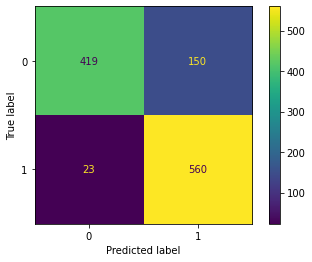

In [72]:
dict_knn_sm=model_report(KNN,'KNN(SMOTE)',y_train_sm,y_test_sm,test_preds,train_preds)
df_report_sm.loc['KNN']=dict_knn_sm.iloc[1,:]

### Report for Original Data

In [73]:
train_preds =KNN.predict(X_train)
test_preds  =KNN.predict(X_test)


         Model Report for  KNN 

ROC_AUC score for train data:  0.8947379641522808
ROC_AUC score for test data:  0.8892723130528009
classification_report for Train

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      2305
           1       0.52      0.94      0.67       407

    accuracy                           0.86      2712
   macro avg       0.75      0.89      0.79      2712
weighted avg       0.92      0.86      0.88      2712


classification_report for Test

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       574
           1       0.51      0.94      0.66       104

    accuracy                           0.85       678
   macro avg       0.75      0.89      0.78       678
weighted avg       0.91      0.85      0.87       678



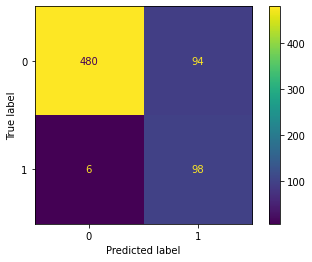

In [74]:
dict_knn=model_report(KNN,'KNN',y_train,y_test,test_preds,train_preds)
df_report.loc['KNN']=dict_knn.iloc[1,:]

KNN model produced great recall and f1 scores for class 1, but performed poorly for class 0 for original data.

# SVC

In [75]:
# setting up SVC model with cross validation
param_grid = {'C': [1,10,100], 'gamma': [1,0.1,0.5]}
svc_model=GridSearchCV(SVC(kernel='rbf',class_weight='balanced',probability=True),param_grid=param_grid,scoring='f1',cv=5)

In [76]:
# fitting the training data
svc_model.fit(X_train_sm,y_train_sm)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', probability=True),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.5]},
             scoring='f1')

### Report for SMOTE data

In [77]:
# predicting classes
train_preds_sm =svc_model.predict(X_train_sm)
test_preds_sm=svc_model.predict(X_test_sm)


         Model Report for  SVC(SMOTE) 

ROC_AUC score for train data:  1.0
ROC_AUC score for test data:  0.9522815447642188
classification_report for Train

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2310
           1       1.00      1.00      1.00      2296

    accuracy                           1.00      4606
   macro avg       1.00      1.00      1.00      4606
weighted avg       1.00      1.00      1.00      4606


classification_report for Test

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       569
           1       0.96      0.95      0.95       583

    accuracy                           0.95      1152
   macro avg       0.95      0.95      0.95      1152
weighted avg       0.95      0.95      0.95      1152



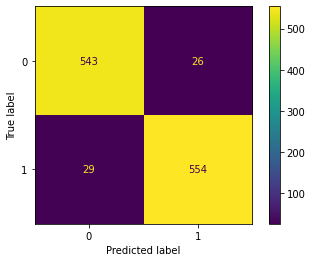

In [78]:
# generating report
dict_svc_sm=model_report(svc_model,'SVC(SMOTE)',y_train_sm,y_test_sm,test_preds_sm,train_preds_sm)
df_report_sm.loc['Support Vector Machine']=dict_svc_sm.iloc[1,:]

### Report for Original Data

In [79]:
# predicting classes
train_preds=svc_model.predict(X_train)
test_preds  =svc_model.predict(X_test)


         Model Report for  SVC 

ROC_AUC score for train data:  0.9833765929210616
ROC_AUC score for test data:  0.994773519163763
classification_report for Train

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2305
           1       0.95      0.98      0.96       407

    accuracy                           0.99      2712
   macro avg       0.97      0.98      0.98      2712
weighted avg       0.99      0.99      0.99      2712


classification_report for Test

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       574
           1       0.95      1.00      0.97       104

    accuracy                           0.99       678
   macro avg       0.97      0.99      0.98       678
weighted avg       0.99      0.99      0.99       678



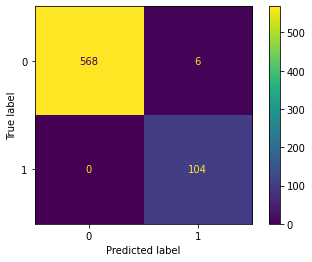

In [80]:
# generating report
dict_svc=model_report(svc_model,'SVC',y_train,y_test,test_preds,train_preds)
df_report.loc['Support Vector Machine']=dict_svc.iloc[1,:]

SVC model performed great for both original and SMOTE sampled data, with 0.95 recall and f1 score values for SMOTE sampled data.

For original data, model produced very fruitful results with recall score of 1.0 and f1 score of 0.97. 

As SVC model predicts most accurately among all experimentation, this model will be selected as final model.